<a href="https://colab.research.google.com/github/laysch/verizon-fwa/blob/main/PREPVerizon2_Polina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/BTT

Mounted at /content/drive
/content/drive/MyDrive/BTT


In [ ]:
df=pd.read_csv("Area_Table_June_2021_Status_V.csv")

<ipython-input-3-c3f134955683>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Area_Table_June_2021_Status_V.csv")


#Cleaning Data
-It the code below I replaced Column 'tech' where 1 is where Wireles Internet is available and 0 where it is not

-Also I replaced Urban with 1 and Rural with 0

-Filtered 'type' to only show data with COUNTY variable

In [ ]:

nan_count=np.sum(df.isnull(),axis=0)
print(nan_count)
df.drop_duplicates(inplace=True)


type           0
id             0
tech           0
urban_rural    0
tribal_non     0
speed          0
has_0          0
has_1          0
has_2          0
has_3more      0
dtype: int64


* Replacing all variables in 'tech' column with 1 where it has WIRELESS INTERNET connection, otherwise 0

In [ ]:
df.replace({"tech": {"w": 1}},regex=True, inplace=True)
df.replace({"tech": {"a": 0, "c":0, "f": 0, "o": 0, "s": 0  }},regex=True, inplace=True)
df.head(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
0,place,100100,1,R,N,0.2,0,0,0,193
1,place,100124,1,R,N,0.2,0,0,0,2639
2,place,100460,1,R,N,0.2,0,0,0,659
3,place,100460,1,U,N,0.2,0,0,0,3912
4,place,100484,1,R,N,0.2,0,0,0,752
5,place,100676,1,R,N,0.2,0,0,0,356
6,place,100820,1,R,N,0.2,0,0,0,1403
7,place,100820,1,U,N,0.2,0,0,0,31892
8,place,100988,1,R,N,0.2,0,0,0,2584
9,place,100988,1,U,N,0.2,0,0,0,19251


* Replacing URBAN with 1 and RURAL with 0

In [ ]:
df.replace({"urban_rural": {"U": 1, "R":0}},regex=True, inplace=True)



* Replacing ALL TRIBAL with 1 and NON-TRIBAL with 0

In [ ]:
df.replace({"tribal_non": {"T": 1, "N":0}},regex=True, inplace=True)



*FILTERING column 'type' to only have information about COUNTY
We will only focus on COUNTY type, because in order to make a map vizialization, we nee as much information as possible, to make predictions more ACCURATE

In [ ]:
df=df[df['type']=="county"]

In [ ]:
df.head(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
2922586,county,41021,1,0,1,0.2,0,0,0,0
2922823,county,1001,1,0,0,0.2,0,0,0,24152
2922824,county,1001,1,1,0,0.2,0,0,0,31993
2922825,county,1003,1,0,0,0.2,0,42,15,104266
2922826,county,1003,1,1,0,0.2,0,3,2,124959
2922827,county,1005,1,0,0,0.2,0,0,0,16265
2922828,county,1005,1,1,0,0.2,0,0,0,8324
2922829,county,1007,1,0,0,0.2,0,0,0,15320
2922830,county,1007,1,1,0,0.2,0,0,0,6816
2922831,county,1009,1,0,0,0.2,0,0,0,52122


In [ ]:
df.tail(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
23727418,county,72141,1,0,0,1000.0,13393,0,0,0
23727419,county,72141,1,1,0,1000.0,13621,0,0,0
23727420,county,72143,1,0,0,1000.0,708,0,0,0
23727421,county,72143,1,1,0,1000.0,35155,0,0,0
23727422,county,72145,1,0,0,1000.0,2026,0,0,0
23727423,county,72145,1,1,0,1000.0,47316,0,0,0
23727424,county,72147,1,0,0,1000.0,1048,0,0,0
23727425,county,72147,1,1,0,1000.0,7284,0,0,0
23727426,county,72149,1,0,0,1000.0,3179,0,0,0
23727427,county,72149,1,1,0,1000.0,17903,0,0,0


* Focusing only on 5 digit zip-codes

In [ ]:
df=df[df['id'].str.len() == 5]

In [ ]:
df.head(20)

,type,id,tech,urban_rural,tribal_non,speed,has_0,has_1,has_2,has_3more
3276800,county,31123,1,0,0,0.2,0,0,0,4625
3276801,county,31125,1,0,0,0.2,0,0,0,3531
3276802,county,31127,1,0,0,0.2,0,0,0,3750
3276803,county,31127,1,1,0,0.2,0,0,0,3293
3276804,county,31129,1,0,0,0.2,0,0,0,4134
3276805,county,31131,1,0,0,0.2,0,0,0,8916
3276806,county,31131,1,1,0,0.2,0,0,0,7049
3276807,county,31133,1,0,0,0.2,0,0,0,2601
3276808,county,31135,1,0,0,0.2,0,0,0,2867
3276809,county,31137,1,0,0,0.2,0,0,0,4279


* Focusing only on Internet SPEED > 1.0 Mbps

In [ ]:
df=df[df['speed']>=1.0]

* Creating NEW column 'has_providers' where 1 if there is at least 1 PROVIDER and 0 if NONE

In [ ]:
df['has_providers']=df[['has_0','has_1','has_2','has_3more']].apply(lambda row: 1 if any(row) else 0, axis=1)

* Checking Areas WITHOUT providers, based on result we have a number 1508 of areas DO NOT have PROVIDERS

In [ ]:
areas_without_providers= len(df[df['has_providers']==0])

print("Number of areas without providers: ", areas_without_providers)

Number of areas without providers:  1508


# Analysis of the Data

In [ ]:

n = len(pd.unique(df['id']))
print(n)

3234


In [ ]:
df.shape

(113241, 11)

* We have 3234 UNIQUE Zip-Codes out of 113241

# Creating Gaussian Mixture Model


In [ ]:
from pandas import DataFrame

In [ ]:
from sklearn import datasets

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
gm = GaussianMixture(n_components=11)

dfTest=df.drop(columns=['type', 'id']).to_numpy()


gm.fit(dfTest)

labels = gm.predict(dfTest)

frame = pd.DataFrame(dfTest)
frame['cluster'] = labels

In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dfTest)

# Normalizing the Data
normalized_df = normalize(scaled_df)

# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,0.642196,-0.672541
1,-0.779285,-0.235756


#Creating Gaussian Mixture Model


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
pip install -U scikit-learn


In [ ]:
# Generate some data

import sklearn
from sklearn import datasets
from sklearn.datasets import make_blobs
X=df.drop(columns=['type','id']).to_numpy()


X = X[:, ::-1] # flip axes for better plotting

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


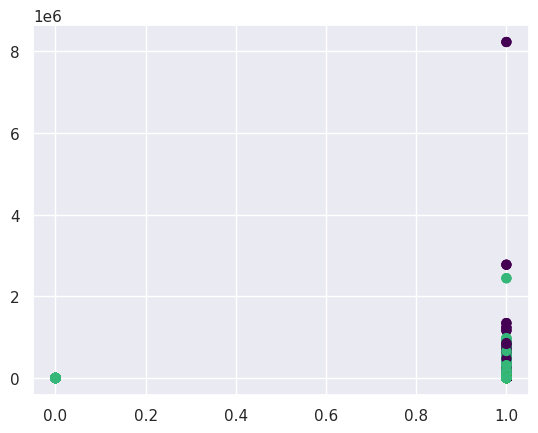

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


### New Section

# K-mean

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
# Generate some data
from sklearn import datasets
from sklearn.datasets import make_blobs
X=df.drop(columns=['type', 'id']).to_numpy()
g = GaussianMixture(n_components=11)

g.fit(X)

labels = g.predict(X)

frame = pd.DataFrame(X)
frame['cluster'] = labels
X = X[:, ::-1] # flip axes for better plotting

<Axes: >

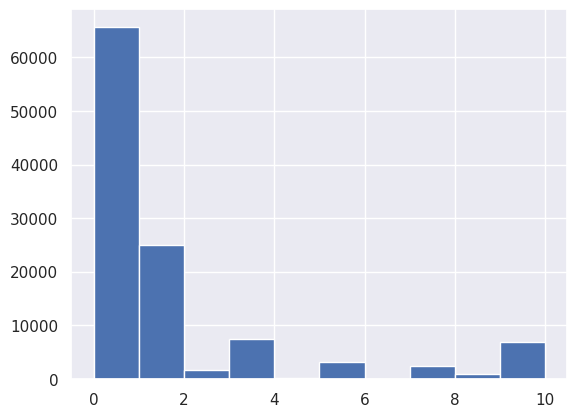

In [ ]:
a = frame['cluster']
a.hist(bins=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


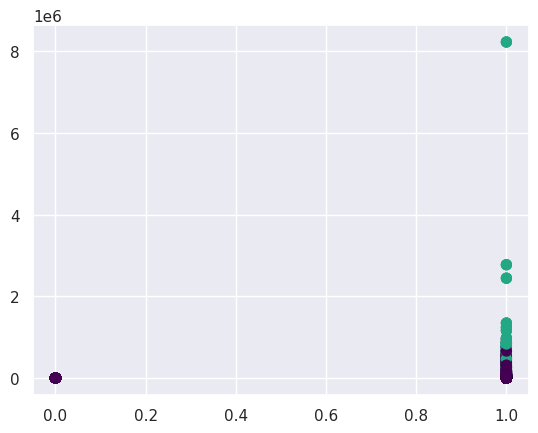

In [ ]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(6, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=6, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


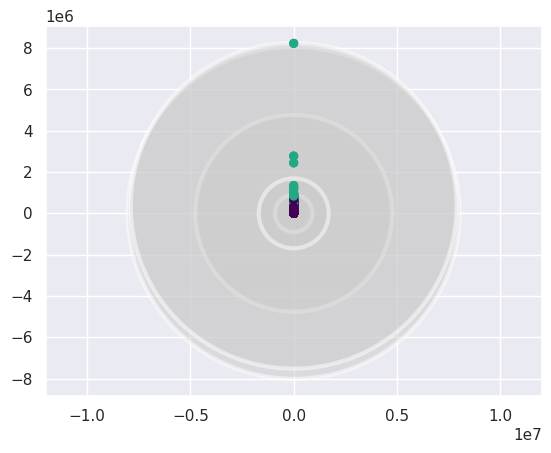

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
#rng = np.random.RandomState(13)
#X_stretched = np.dot(X, (2, 2))

#kmeans = KMeans(n_clusters=6, random_state=0)
#plot_kmeans(kmeans, X_stretched)


# GMM

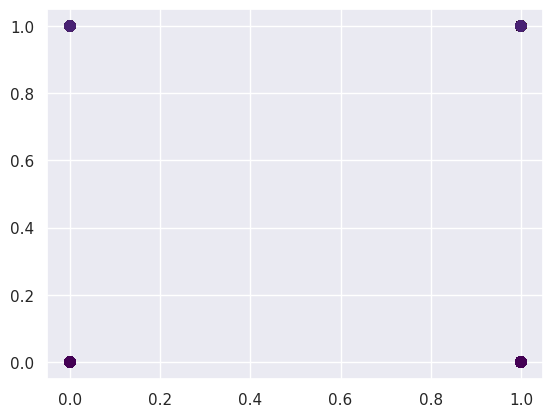

In [ ]:
from sklearn import mixture


gm1 = GaussianMixture(n_components=12)
X=df.drop(columns=['type', 'id']).to_numpy()

gm1.fit(X)

labels = gm1.predict(X)

frame = pd.DataFrame(X)
frame['cluster'] = labels

from sklearn.mixture import GaussianMixture

labels = gm1.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

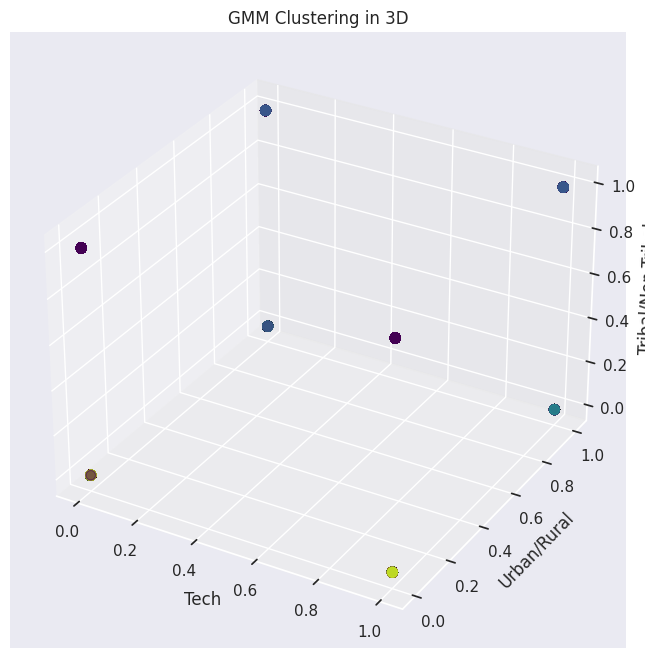

In [ ]:
X = df.drop(columns=['type', 'id']).to_numpy()

# Specify the number of components (clusters) for the Gaussian Mixture Model
n_components = 12
gm1 = GaussianMixture(n_components=n_components, random_state=0)
gm1.fit(X)

# Predict cluster labels
labels = gm1.predict(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('Tech')
ax.set_ylabel('Urban/Rural')
ax.set_zlabel('Tribal/Non-Tribal')

plt.title('GMM Clustering in 3D')
plt.show()

In [ ]:
probs = gm1.predict_proba(X)
print(probs[:5].round(3))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


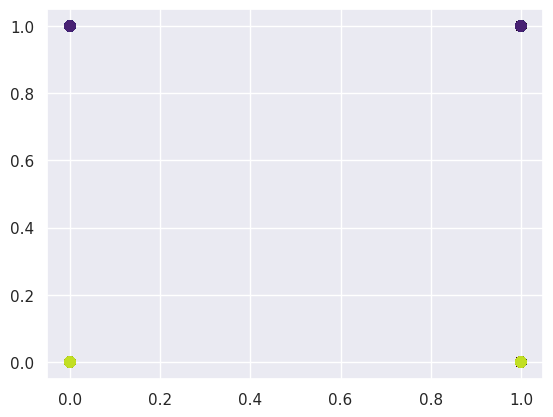

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import numpy as np
from matplotlib.patches import Ellipse

from matplotlib.patches import Ellipse

from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-41-927dd15b33f3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=7, cmap='viridis')


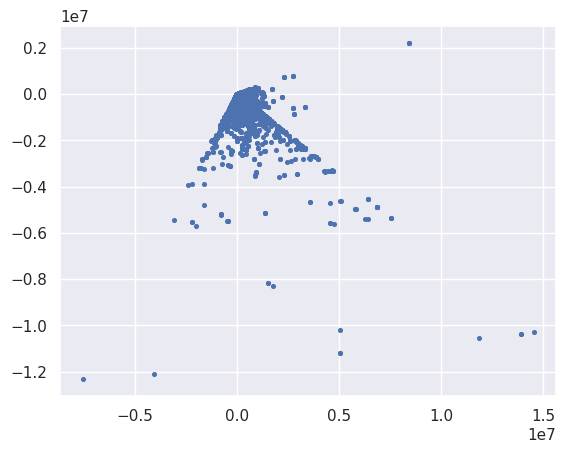

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(13)

# Generate a random rotation matrix compatible with the number of features
rotation_matrix = rng.randn(X.shape[1], 2)

# Apply the rotation to the data
X_stretched = np.dot(X, rotation_matrix)

# Plot the stretched data
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=7, cmap='viridis')





/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
<ipython-input-40-1d19e8b70b4a>:24: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


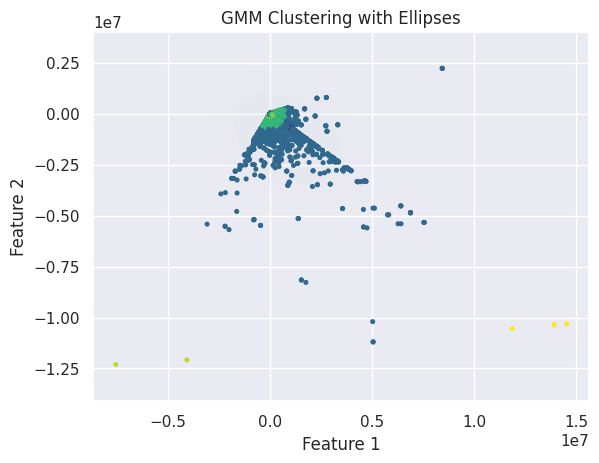

In [ ]:
gm1 = GaussianMixture(n_components=10, random_state=42, reg_covar=0.1)

# Assuming that the 'plot_gmm' function is defined
plot_gmm(gm1, X_stretched)

plt.title('GMM Clustering with Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


<ipython-input-40-1d19e8b70b4a>:20: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(covariance)


ValueError: ignored

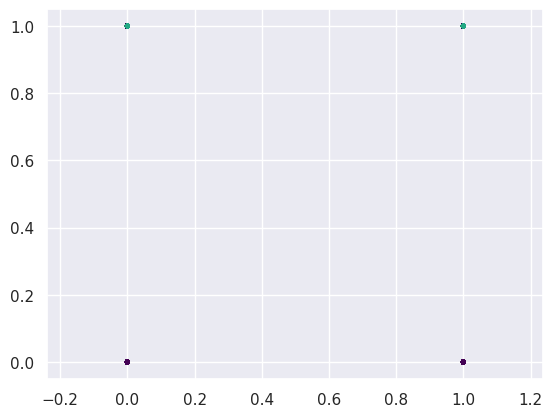

In [ ]:
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
plot_gmm(gmm, X)

# New Section

#Density Estimation

In [ ]:
from sklearn.datasets import make_moons
X = df.drop(columns=['type', 'id']).to_numpy()

plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
gmm2 = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
plot_gmm(gmm2, X_stretched)

# New Section

In [ ]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]
# AIC- estimator of prediction error
#BIC - criterion for model selection among a finite set of models;
#       models with lower BIC are generally preferred
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Final GMM

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
from sklearn.cluster import KMeans

X = df.drop(columns=['type', 'id']).to_numpy()

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
gmm = GaussianMixture(n_components=11).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        # If the covariance is a scalar, make it the width and height
        angle = 0
        width = height = 2 * np.sqrt(np.abs(covariance))

    # Convert position to a tuple to avoid the ValueError
    position = tuple(position)

    # Draw the Ellipse
    ellipse = Ellipse(position, width, height, angle=angle, **kwargs)
    ax.add_patch(ellipse)


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gm = GaussianMixture(n_components=11, random_state=42)
plot_gmm(gm, X)

# NEW


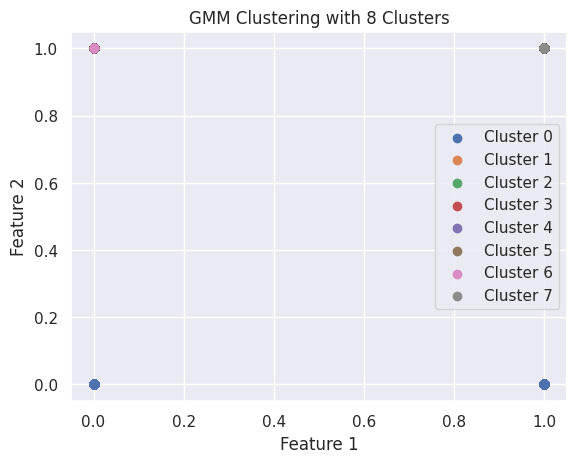

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Assuming X is a NumPy array with your data
features = X[:, :8]  # Assuming you want to use the first 8 columns as features

# Fit the GMM model to the dataset with 8 components
gmm = GaussianMixture(n_components=8)
gmm.fit(features)

# Assign a label to each sample
labels = gmm.predict(features)

# Assign the labels to the DataFrame
X_with_labels = np.column_stack((X, labels))

# Extract data for each cluster
clusters = [X_with_labels[X_with_labels[:, -1] == i] for i in range(8)]

# Plot clusters in the same plot
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')

plt.title('GMM Clustering with 8 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()